# 20190926 고급통계학 

## [**R for Data science**](https://r4ds.had.co.nz)

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
mpg[1:5,]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
class(mpg)

[1] "tbl_df"     "tbl"        "data.frame"

tbl_df 형태로 바꿔주면 tidyverse를 활용할 수 있다. 주피터 노트북에서는 볼수 없음 *tbl_df()*

In [13]:
unique(mpg$class)

[1] "compact"    "midsize"    "suv"        "2seater"    "minivan"   
[6] "pickup"     "subcompact"

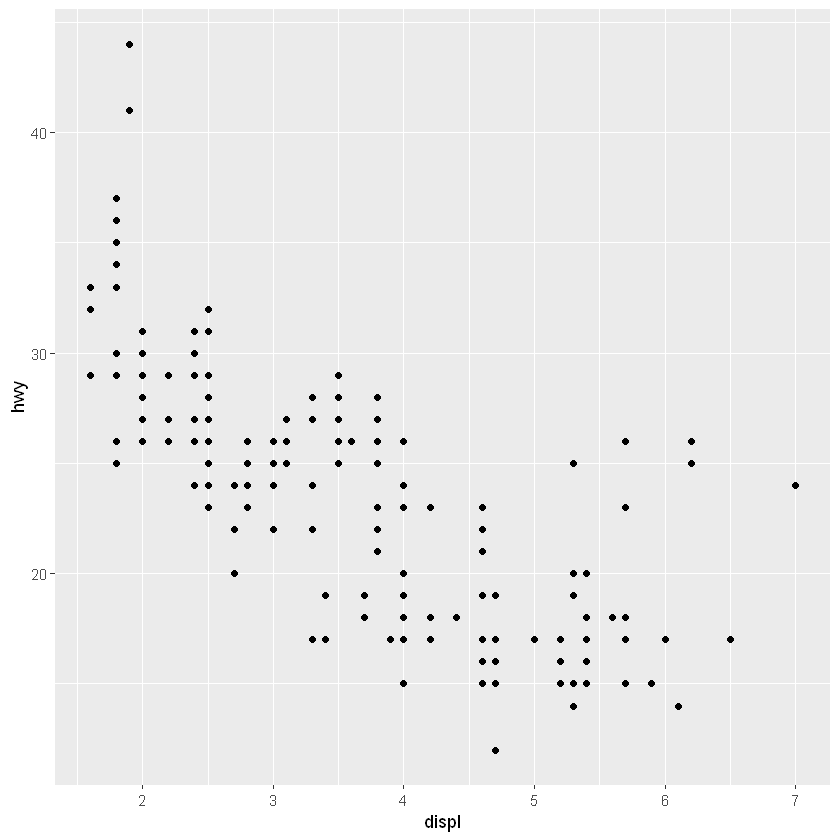

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

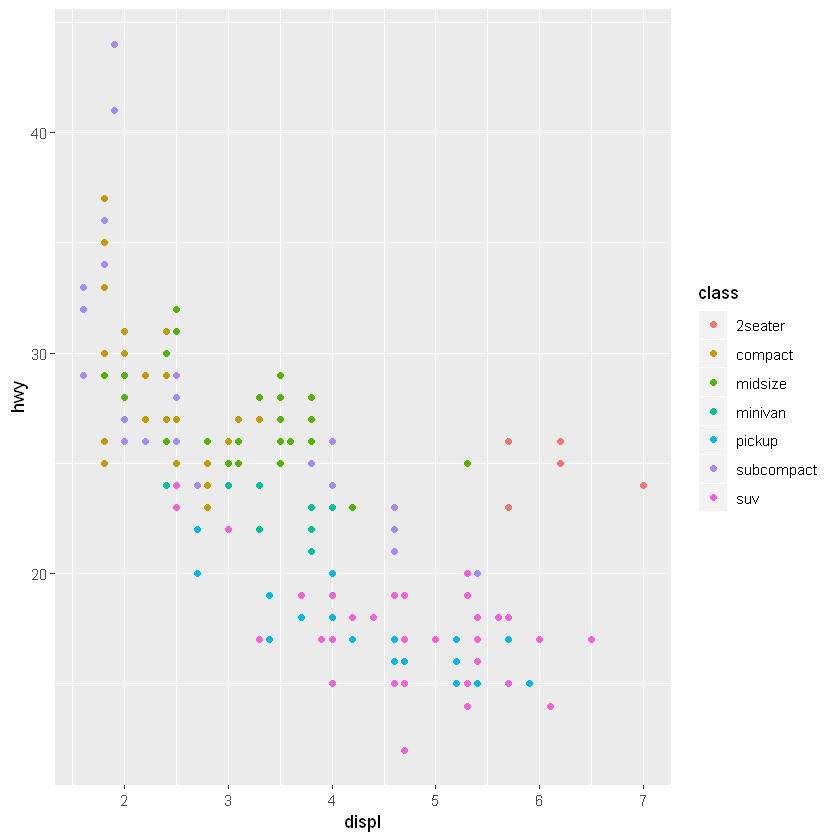

In [6]:
ggplot(data = mpg, aes(x = displ, y = hwy, color = class )) + 
  geom_point()

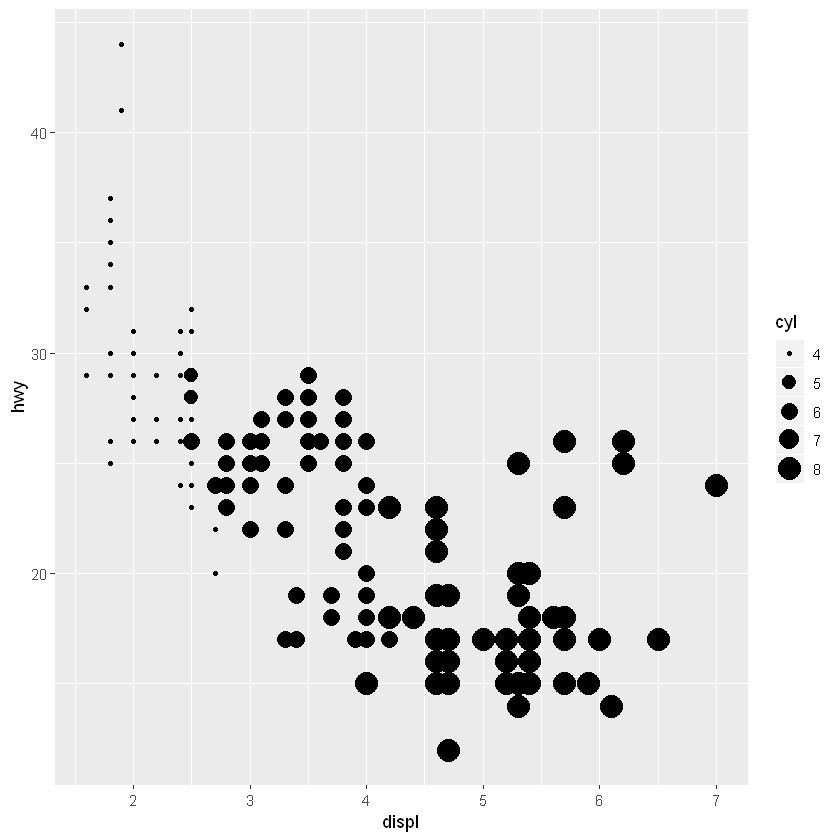

In [10]:
ggplot(data = mpg, aes(x = displ, y = hwy, size = cyl )) + 
  geom_point()

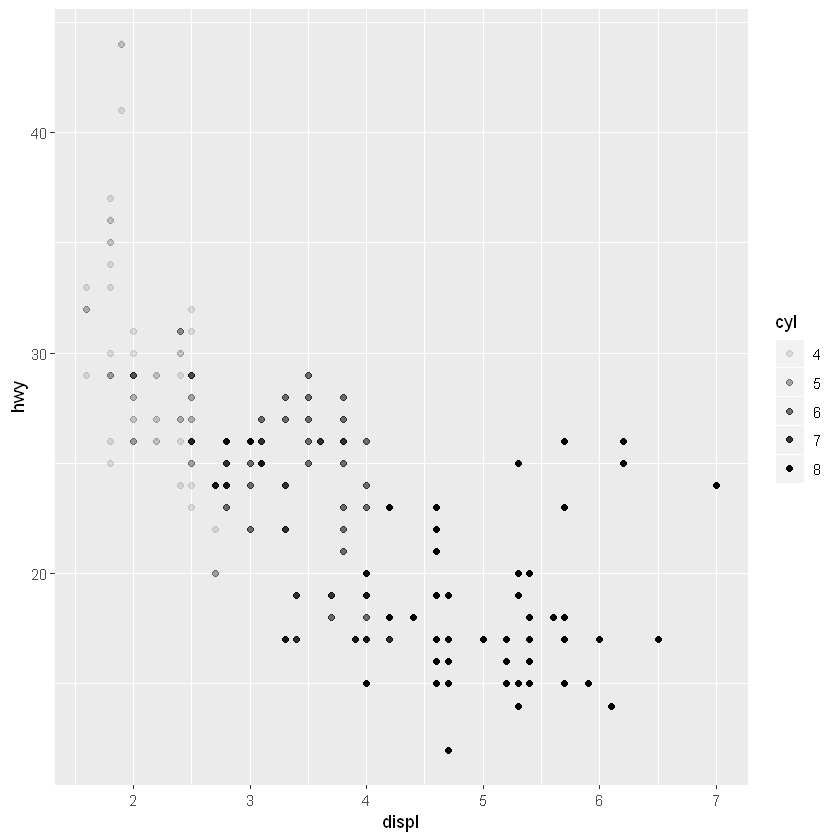

In [11]:
ggplot(data = mpg, aes(x = displ, y = hwy, alpha = cyl )) + 
  geom_point()

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 62 rows containing missing values (geom_point)."

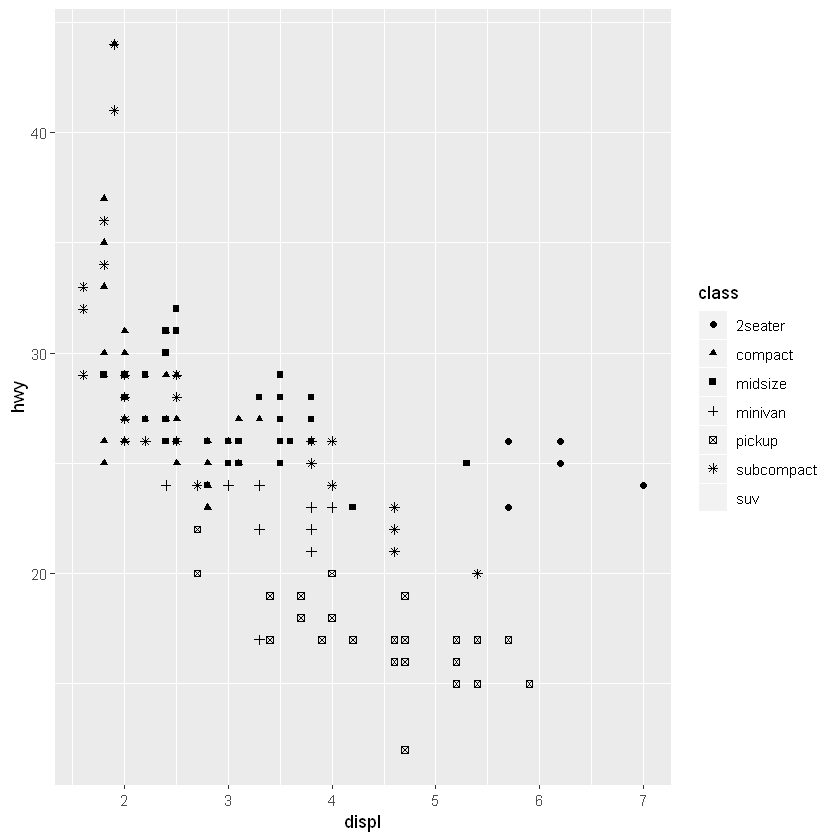

In [12]:
ggplot(data = mpg, aes(x = displ, y = hwy, shape = class )) + 
  geom_point()

## [**facets guide**](https://r4ds.had.co.nz/data-visualisation.html#facets)

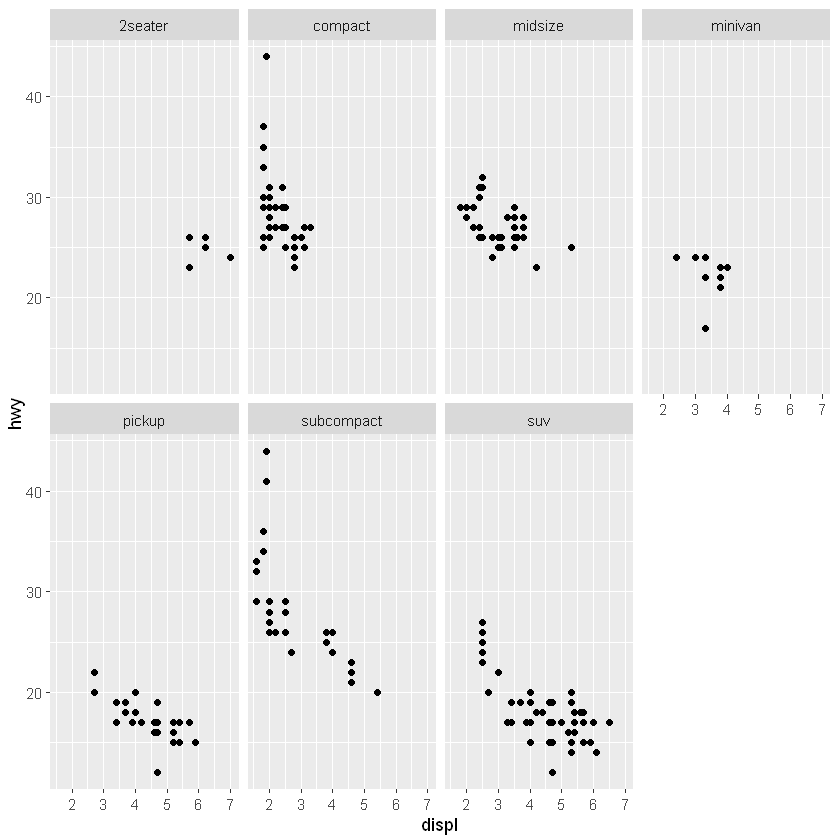

In [15]:
ggplot(data = mpg , aes(x = displ, y = hwy)) + 
  geom_point() +  # geom poing 점으로 보여달라
  facet_wrap(~ class, nrow = 2)

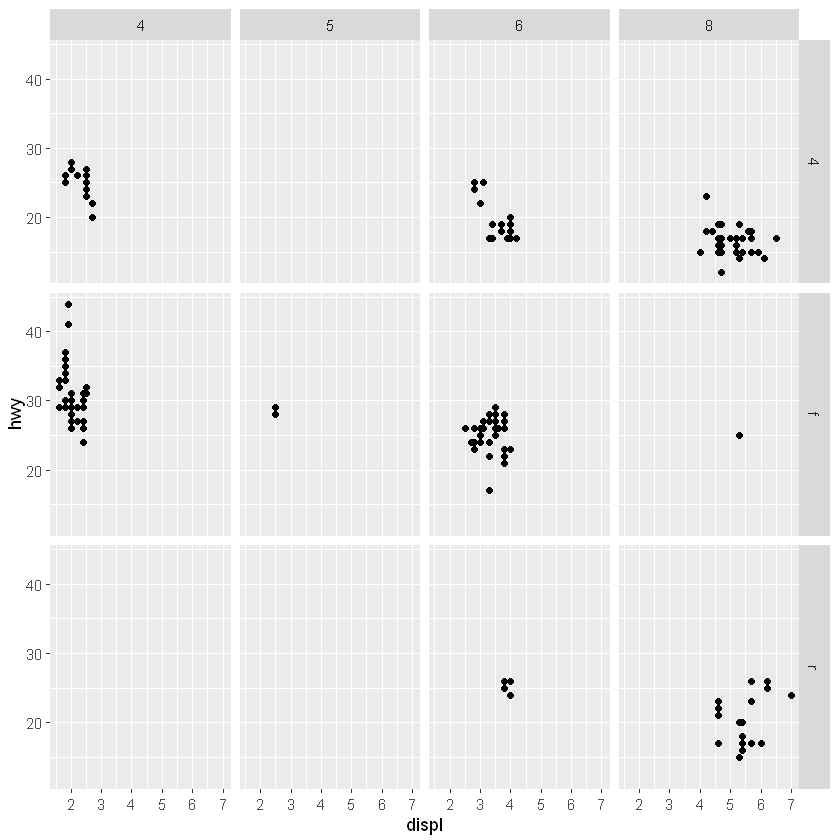

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

## [**geom**](https://r4ds.had.co.nz/data-visualisation.html#geometric-objects)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


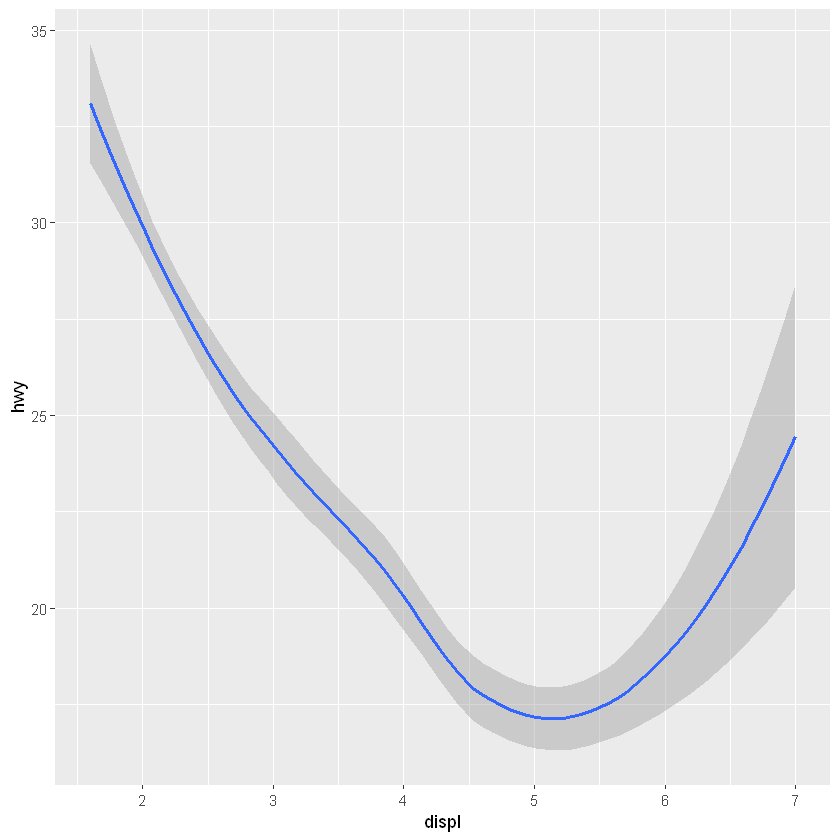

In [18]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy)) # smooth 할 때 loess (비선형회귀모형)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


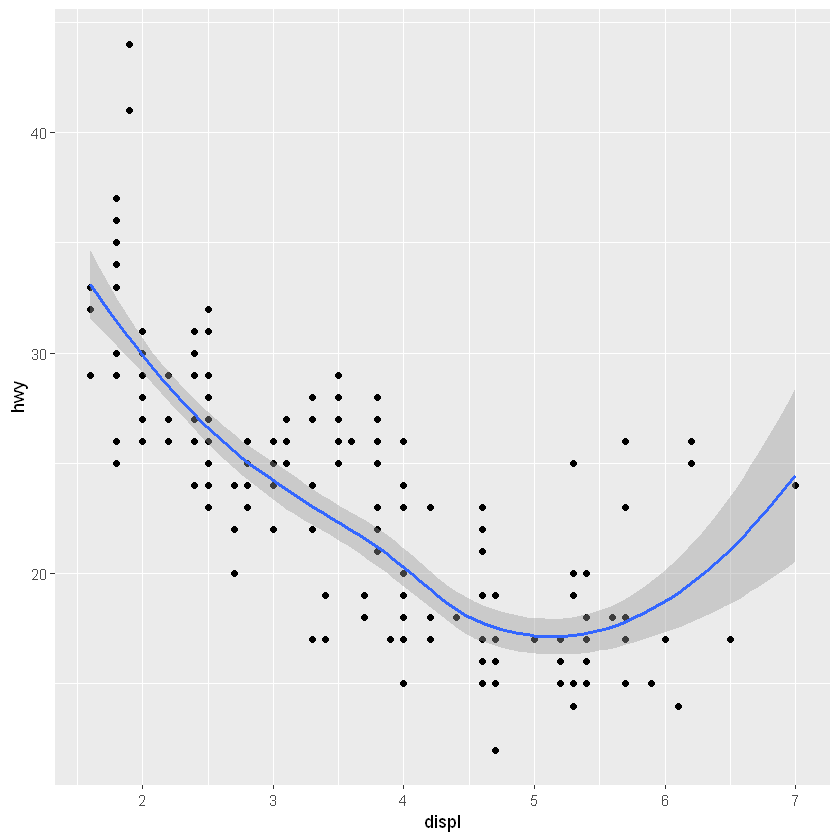

In [19]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

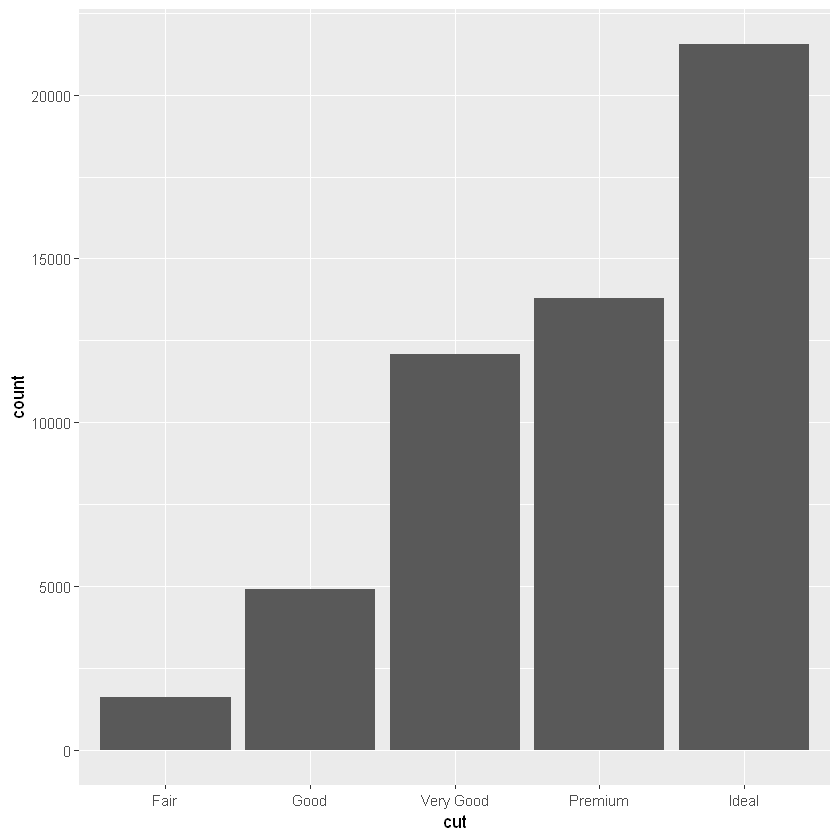

In [20]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

## [**Theme**](https://r4ds.had.co.nz/data-visualisation.html#geometric-objects)

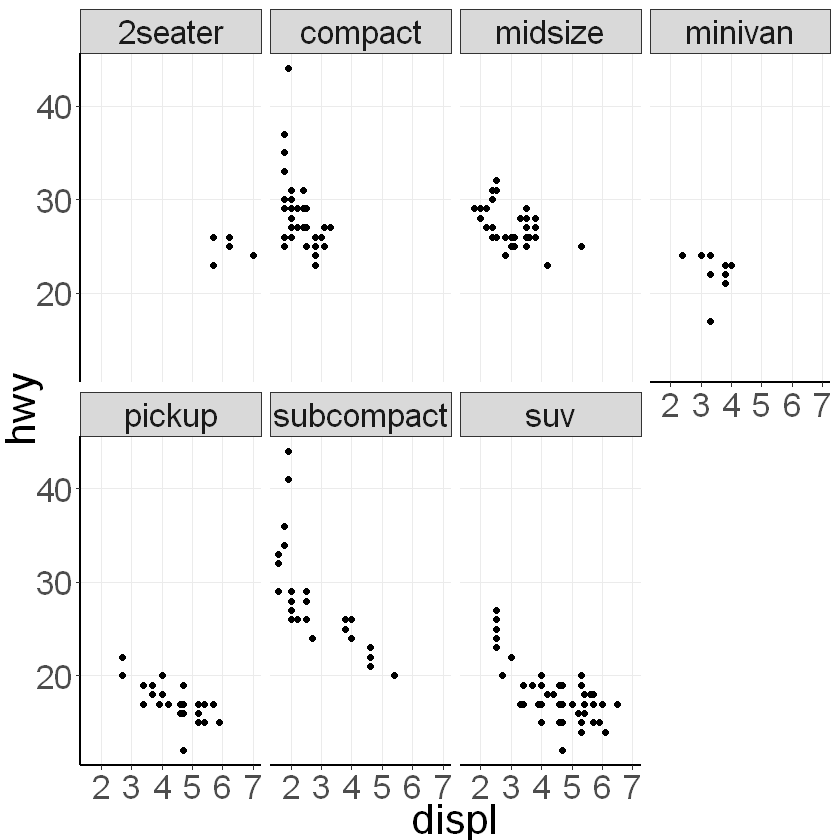

In [26]:
ggplot(data =mpg ,aes(x=displ, y=hwy)) + 
  geom_point() +
  facet_wrap(~ class, nrow=2) + theme_bw() +
  theme(axis.line=element_line(size= .8, color="black"),
       panel.grid.minor=element_blank(),
       panel.border = element_blank(),
       text = element_text(size=25)
       )

In [ ]:
postscript(file = "test.eps", width=7, height=7)
ggplot(data=mpg)+
 geom_point(mapping = aes(x=disql, y=hwy)) + theme_bw() +
 theme(axis.line = element_line(size=.8, color = "black"),
      panel.grid.minor=element_blank(),
       panel.border = element_blank(),
       text = element_text(size=25)
       )
dev.off

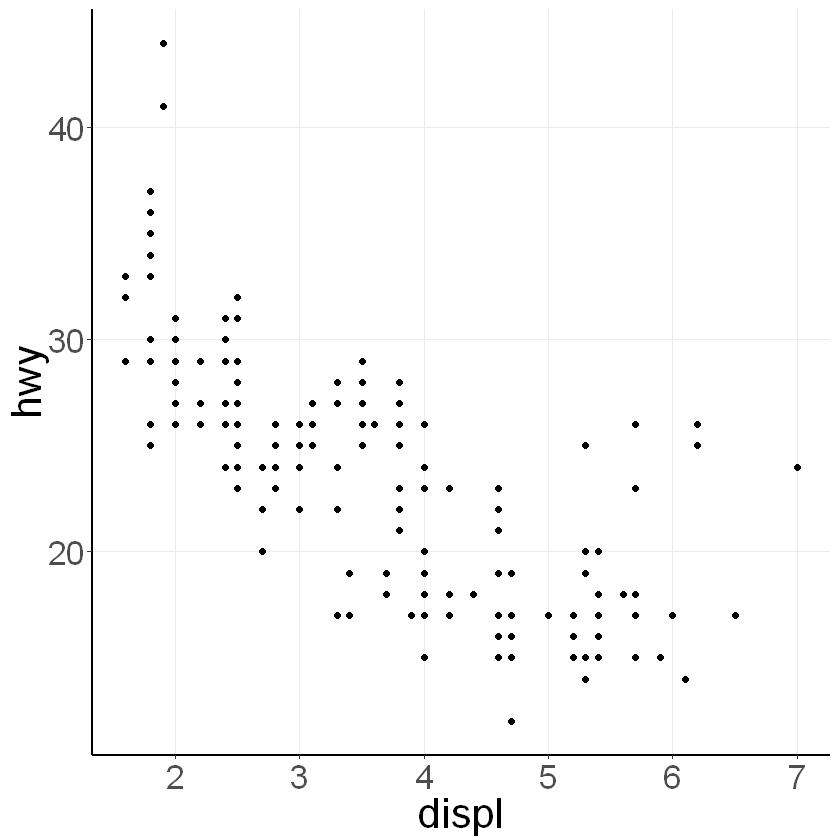

In [25]:
ggplot(data = mpg ) + 
  geom_point(mapping = aes(x=displ, y=hwy)) + theme_bw() +
  theme(axis.line=element_line(size= .8, color="black"),
       panel.grid.minor=element_blank(),
       panel.border = element_blank(),
       text = element_text(size=25)
       )

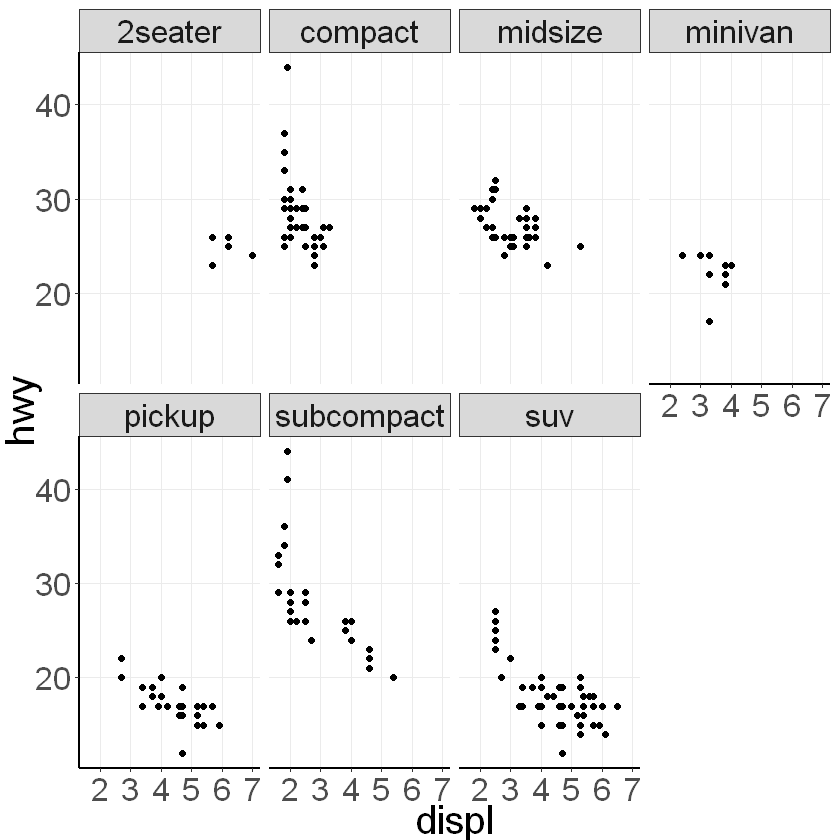

In [30]:
ggplot(data =mpg ,aes(x=displ, y=hwy)) + 
  geom_point() +
  facet_wrap(~ class, nrow=2) + theme_bw() +
  theme(axis.line=element_line(size= .7, color="black"),
       panel.grid.minor=element_blank(),
       panel.border = element_blank(),
       text = element_text(size=24)
       )

## dplyr

## [**filter**](https://r4ds.had.co.nz/transform.html#filter-rows-with-filter)

In [41]:
install.packages("nycflights13")

package 'nycflights13' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmpa6LFSc\downloaded_packages


In [43]:
library(nycflights13)

In [87]:
head(filter(flights, month == 1, day == 1))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [89]:
head(filter(flights, month == 11 | month == 12))# logical operators

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


In [90]:
head(filter(flights, month %in% c(11, 12)))# logical operators 위의 코드와동일

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


## [**arrange**](https://r4ds.had.co.nz/transform.html#filter-rows-with-filte)

In [91]:
head(arrange(flights, desc(dep_delay)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


## [**select**](https://r4ds.had.co.nz/transform.html#select)

In [93]:
head(select(flights, year, month, day))

year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


## [**mutate**](https://r4ds.had.co.nz/transform.html#add-new-variables-with-mutate)

In [94]:
flights_sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)
head(mutate(flights_sml,
  gain = dep_delay - arr_delay,
  speed = distance / air_time * 60
))

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
2013,1,1,2,11,1400,227,-9,370.0441
2013,1,1,4,20,1416,227,-16,374.2731
2013,1,1,2,33,1089,160,-31,408.3750
2013,1,1,-1,-18,1576,183,17,516.7213
2013,1,1,-6,-25,762,116,19,394.1379
2013,1,1,-4,12,719,150,-16,287.6000


## [**summarize**](https://r4ds.had.co.nz/transform.html#grouped-summaries-with-summarise)

In [95]:
by_day <- group_by(flights, year, month, day)
head(summarise(by_day, delay = mean(dep_delay, na.rm = TRUE)))

year,month,day,delay
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


## pipe operators

In [97]:
by_dest <- group_by(flights, dest)
delay <- summarise (by_dest, 
                    count = n(), 
                    dist=mean(distance, na.rm=T), 
                    delay = mean(arr_delay, na.rm=T))
delay <- filter(delay, count > 20, dest != "HNL")
head(delay)

dest,count,dist,delay
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


In [98]:
delays <- flights %>% group_by(dest)%>%
        summarise(count = n(),
                 dist=mean(distance, na.rm=T), 
                 delay = mean(arr_delay, na.rm=T) ) %>%
        filter(count > 20, dest != "HNL")
head(delays) # 위의 코드와 동일

dest,count,dist,delay
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


In [58]:
unique(flights$dest)

[1] "IAH" "MIA" "BQN" "ATL" "ORD" "FLL" "IAD" "MCO" "PBI" "TPA" "LAX" "SFO"
 [13] "DFW" "BOS" "LAS" "MSP" "DTW" "RSW" "SJU" "PHX" "BWI" "CLT" "BUF" "DEN"
 [25] "SNA" "MSY" "SLC" "XNA" "MKE" "SEA" "ROC" "SYR" "SRQ" "RDU" "CMH" "JAX"
 [37] "CHS" "MEM" "PIT" "SAN" "DCA" "CLE" "STL" "MYR" "JAC" "MDW" "HNL" "BNA"
 [49] "AUS" "BTV" "PHL" "STT" "EGE" "AVL" "PWM" "IND" "SAV" "CAK" "HOU" "LGB"
 [61] "DAY" "ALB" "BDL" "MHT" "MSN" "GSO" "CVG" "BUR" "RIC" "GSP" "GRR" "MCI"
 [73] "ORF" "SAT" "SDF" "PDX" "SJC" "OMA" "CRW" "OAK" "SMF" "TUL" "TYS" "OKC"
 [85] "PVD" "DSM" "PSE" "BHM" "CAE" "HDN" "BZN" "MTJ" "EYW" "PSP" "ACK" "BGR"
 [97] "ABQ" "ILM" "MVY" "SBN" "LEX" "CHO" "TVC" "ANC" "LGA"

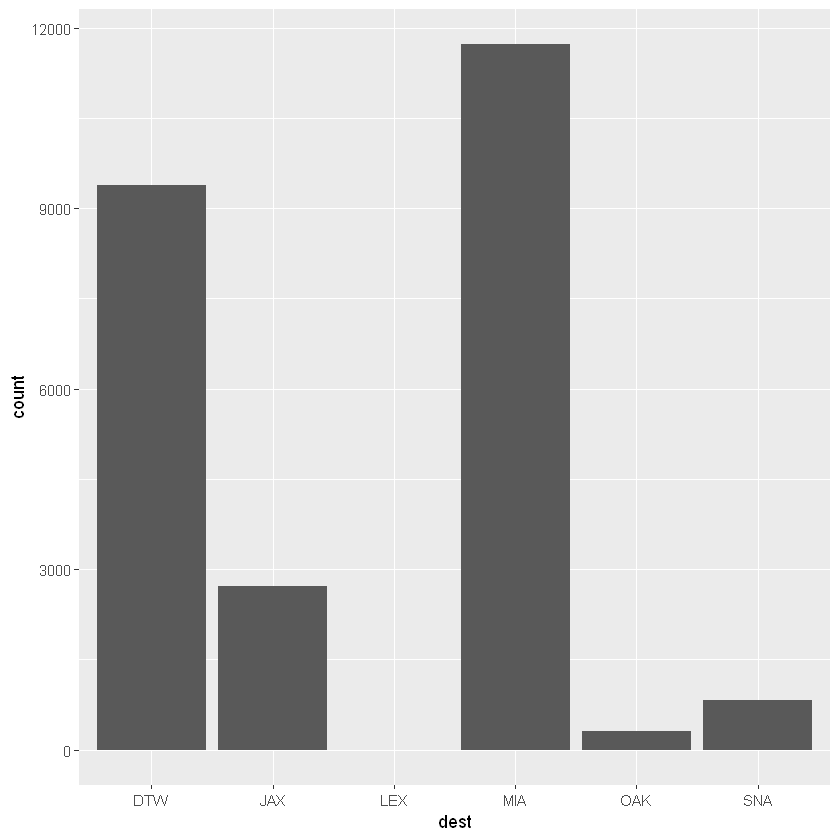

In [76]:
flights %>%
filter(dest == "DTW" | dest =="MIA"|dest == "JAX" |dest =="LEX" | dest =="SNA"| dest =="OAK" ) %>%
group_by(dest) %>%
summarize(count=n(),
         dist=mean(distance, na.rm=T)) %>%
ggplot(aes(x=dest, y=count)) + 
geom_bar(stat = "identity")

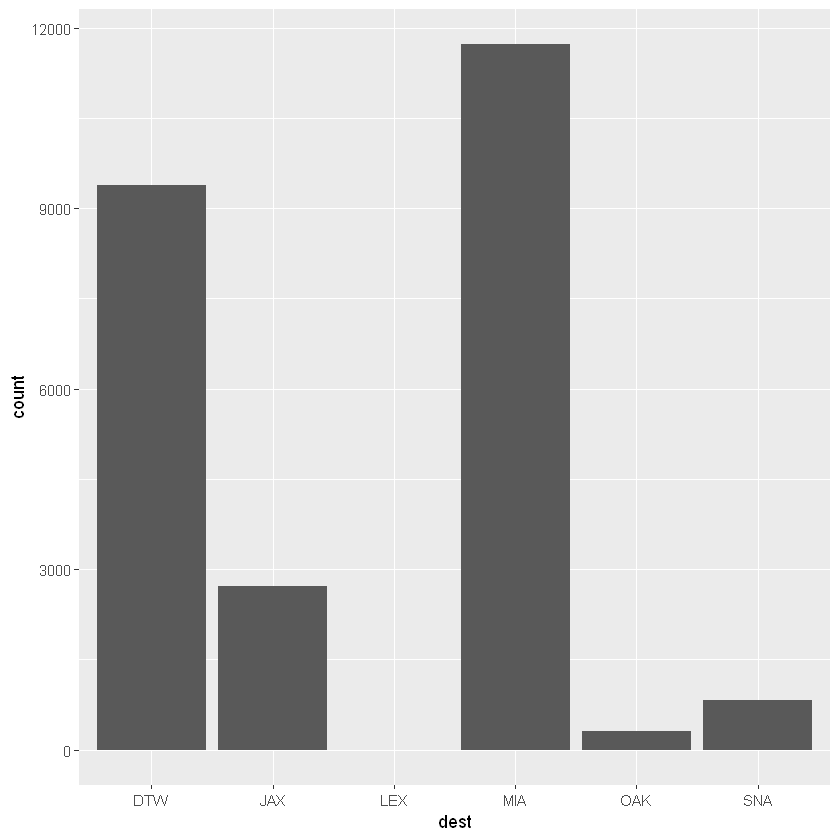

In [78]:
flights %>%
filter(dest == "DTW" | dest =="MIA"|dest == "JAX" |dest =="LEX" | dest =="SNA"| dest =="OAK" ) %>%
group_by(dest) %>%
summarize(count=n(),
         dist=max(distance, na.rm=T)) %>%
ggplot(aes(x=dest, y=count)) + 
geom_bar(stat = "identity")

In [81]:
flights %>% 
filter(dest == "ALT" & origin %in% c("LGA", "JFK", "EWR")) %>%
select(dep_delay, arr_time, origin) %>%
group_by(origin) %>%
summarize( n=n(),
         mean_dep_delay= mean(dep_delay, na.rm=T))

origin,n,mean_dep_delay


## tidyr

## [**gather**](https://r4ds.had.co.nz/tidy-data.html#gathering)

In [82]:
table4a

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [83]:
table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [84]:
table4b %>% 
  gather(`1999`, `2000`, key = "year", value = "population")

country,year,population
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


## [**spread**](https://r4ds.had.co.nz/tidy-data.html#spreading)

In [85]:
table2

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


In [86]:
table2 %>%
    spread(key = type, value = count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583
